# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

<ipython-input-3-edc3dd318221>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  picture = rgb2gray(picture)


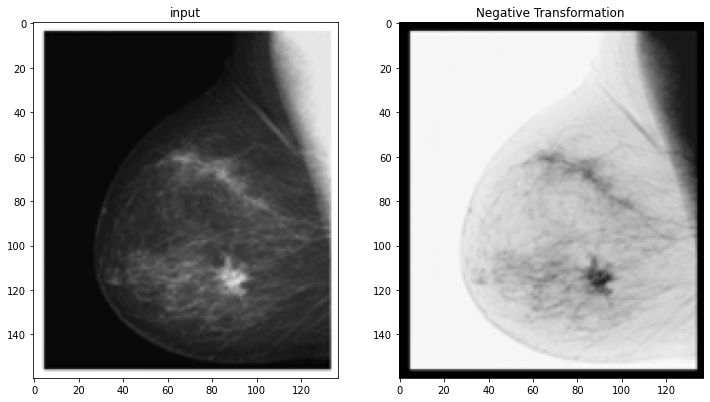

In [3]:
'''
1
Negative Transformation
'''
picture1=io.imread('imgs/Picture1.png')

def Negative(picture):
    picture = rgb2gray(picture)
    negativePicture =  1 - picture
    show_images( images = [picture, negativePicture], titles = ["input","Negative Transformation"] )
    
Negative(picture1)



<ipython-input-10-32f610c1f03a>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  picture = rgb2gray(picture)


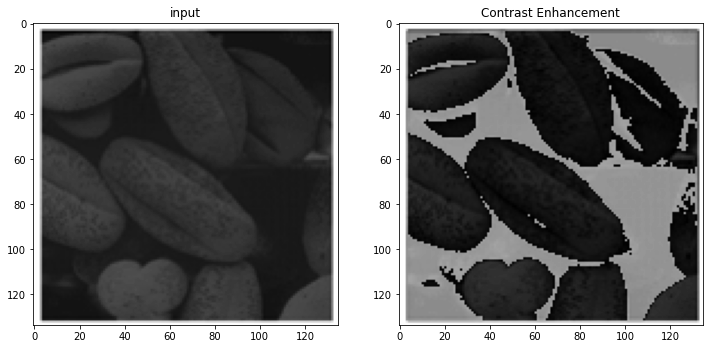

In [10]:
'''
2
Contrast Enhancement

y2-y1   200-50
----- = ------- = 1.5
x2-x1   100-0

y - 50 = 1.5(x-0)
y = 1.5x + 50

'''
picture2 = io.imread("imgs/Picture2.png")

def Contrast_Enhancement(picture):
    picture = rgb2gray(picture)
    enhancedPicture = picture.copy()
    mask = (picture) <= 100/255
    enhancedPicture[mask] = 1.5 * picture[mask] + 50/255
    show_images( images = [picture, enhancedPicture], titles = ["input","Contrast Enhancement"] )
    
Contrast_Enhancement(picture=picture2)


<ipython-input-10-355c97bba79e>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  picture=rgb2gray(picture)


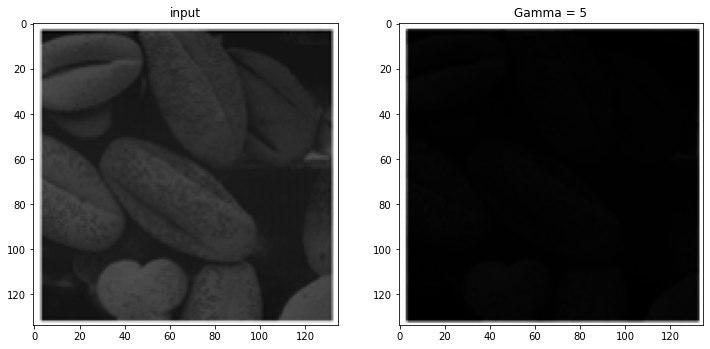

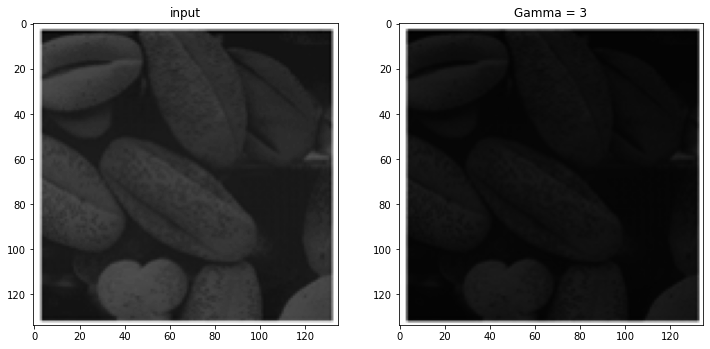

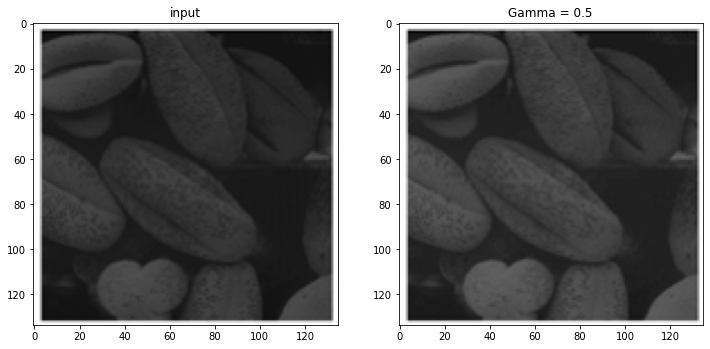

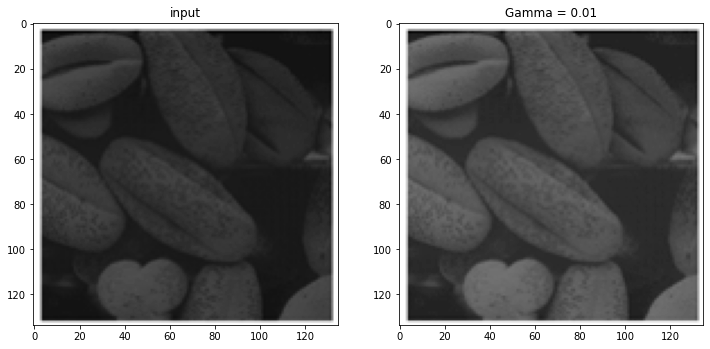

In [10]:
'''
3
Gamma Correction
'''
picture2 = io.imread("imgs/Picture2.png")

def Gamma_Correction(picture,c,gamma):
    picture=rgb2gray(picture)
    correctedPicture= c * (picture**gamma)
    show_images( images = [picture, correctedPicture], titles = ["input",f'Gamma = {gamma}'])
    
                                                                
Gamma_Correction(picture = picture2, c = 1, gamma = 5)
Gamma_Correction(picture = picture2, c = 1, gamma = 3)
Gamma_Correction(picture = picture2, c = 1, gamma = 0.5)
Gamma_Correction(picture = picture2, c = 1, gamma = 0.01)




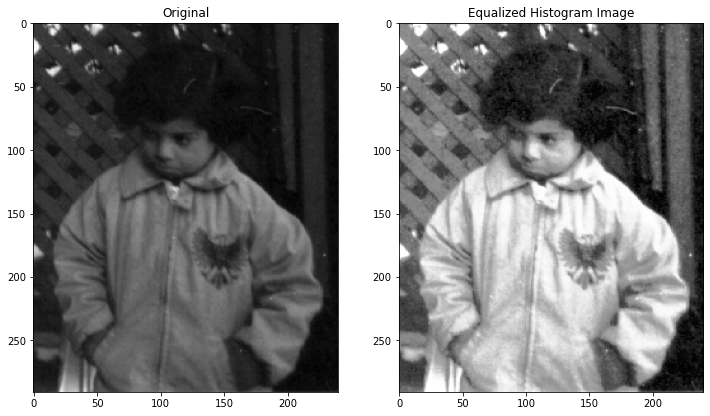

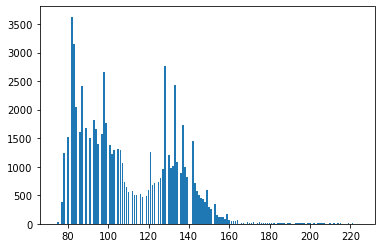

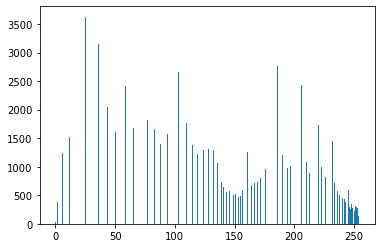

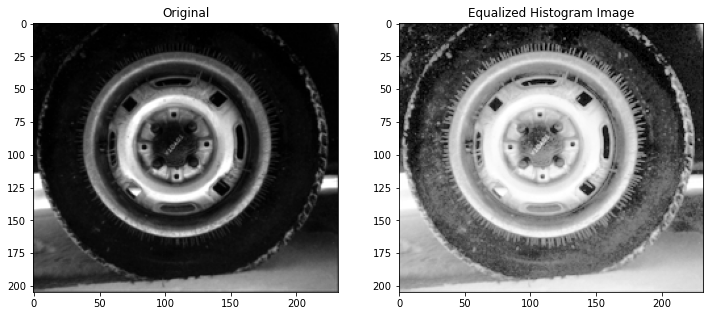

array([[ 51., 105.,  76., ..., 199., 206., 188.],
       [ 84., 115., 119., ..., 210., 230., 208.],
       [ 84., 127., 111., ..., 193., 229., 206.],
       ...,
       [153., 170., 176., ..., 219., 223., 200.],
       [174., 200., 206., ..., 224., 226., 204.],
       [182., 202., 200., ..., 200., 204., 183.]])

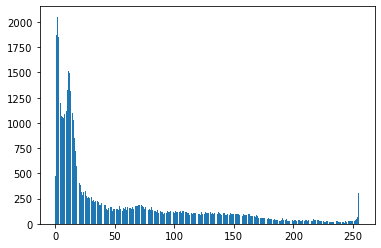

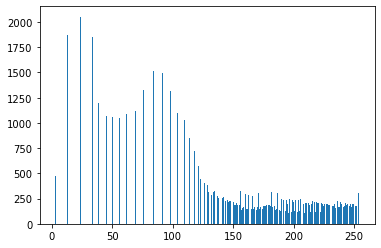

In [26]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist( name, nbins=256):
    #name = rgb2gray(name)
    size = name.shape[0] * name.shape[1]
    
    H    = histogram(name, list(range(0, nbins)),'dtype')[0]
    H_c  = np.cumsum(H)

    T =  np.around((nbins-1) * H_c / size)   
        
    equalizedImg = name.copy()
    equalizedImg= T[name]
    
    show_images( images = [name, equalizedImg], titles = ["Original","Equalized Histogram Image"])
    showHist(name)
    showHist(equalizedImg)
    return equalizedImg
    

pout=io.imread("imgs/pout.tif")
tire=io.imread("imgs/tire.tif")
getImageWithHist(pout,256)
getImageWithHist(tire,256)


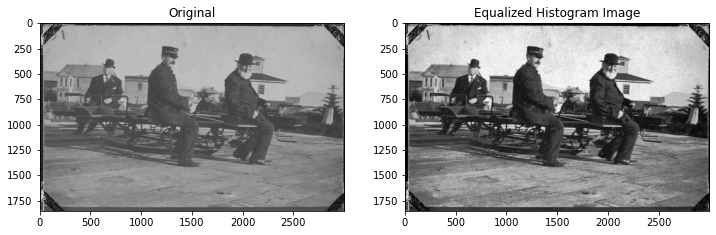

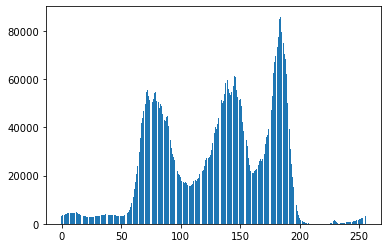

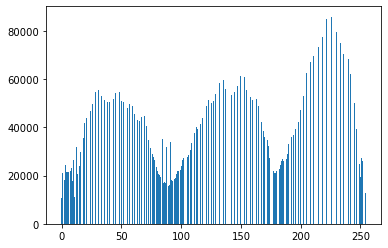

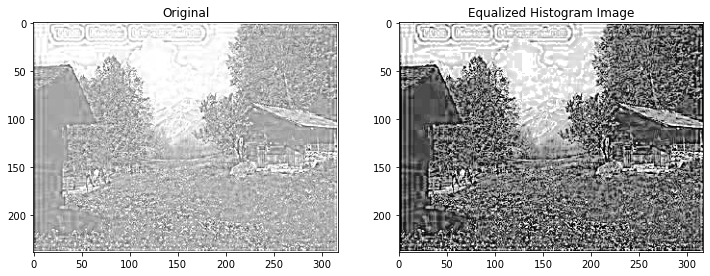

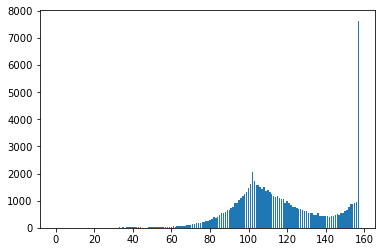

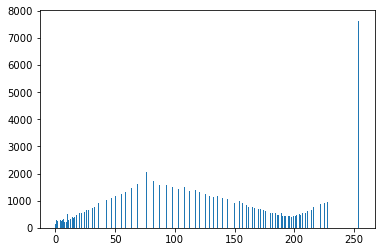

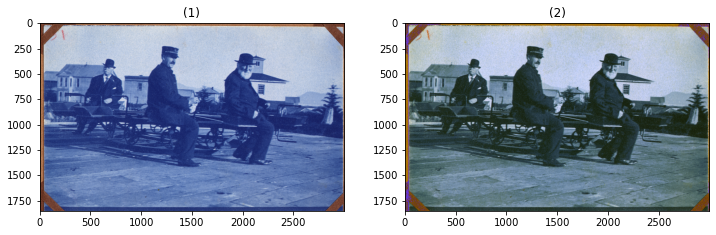

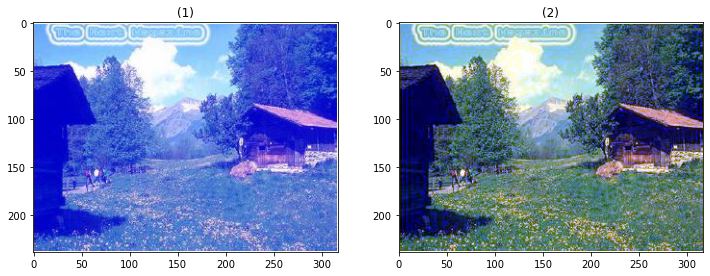

In [46]:
image1 = io.imread('1.jpg')
image2 = io.imread('2.jpg')

def blue_correction(image):
    copyImage=image.copy()
    minValue=np.amin(copyImage[:,:,2])
    if minValue < 10:
        minValue = 40
    copyImage[:,:,2]=copyImage[:,:,2]-minValue
    
    copyImage[:,:,2] = getImageWithHist(copyImage[:,:,2])
    return copyImage
    
correctedImage1=blue_correction(image1)
correctedImage2=blue_correction(image2)
show_images(images=[image1,correctedImage1])
show_images(images=[image2,correctedImage2])